In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

---

# Loading models


We build our models using sklearn and Keras.

In [2]:
cd ../input/nlunaluhodo

/kaggle/input/nlunaluhodo


In [3]:
from load_embeddings import DataEmbeddings, BertEmbeddings, SoftAuxEmbeddings, HardAuxEmbeddings
from BiLSTM import BiLstm
from LSTM import Lstm
from Bert_LSTM import Bert_Lstm
from BOW_LSTM import Bow_Lstm
from BOW_Logistic import Bow_Logistic
from Soft_Aux import Soft_Aux
from Soft_Main import Soft_Main
from Hard_Main import Hard_Main
from evaluation import pred_classes_dt, pred_classes_f1, plot_roc_curve, plot_confusion_matrix

Using TensorFlow backend.


# Loading Data

The data comes from [Berkeley Enron Email Analysis Project](http://bailando.sims.berkeley.edu/enron_email.html). It is a multilabel classification problems about Emails. Here we use the first main classification of the emails and try to build a model to classify emails into 6 classes:

1.1 Company Business, Strategy, etc.<br/>
1.2 Purely Personal<br/>
1.3 Personal but in professional context (e.g., it was good working with you)<br/>
1.4 Logistic Arrangements (meeting scheduling, technical support, etc)<br/>
1.5 Employment arrangements (job seeking, hiring, recommendations, etc)<br/>
1.6 Document editing/checking (collaboration)

data_index is a boostrap index to upsample our data, it is used as increasing weight in multitask learning.

In [4]:
cd ../../working

/kaggle/working


In [5]:
data_index = pickle.load(open('../input/upsamplekfoldindex/data_index.p', 'rb'))
beeap_1 = pd.read_csv('../input/beeapfinal/beeap_1.csv')
beeap_1.drop('Unnamed: 0', axis=1, inplace=True)

---

# Models

## BOW Logistic; BOW LSTM; GloVe LSTM; GloVe BiLSTM

In [6]:
dataset = DataEmbeddings(label_column = [str(i+1) for i in range(6)])
X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer = dataset.load_data_embeddings(beeap_1, '../input/glove-6b/glove.6B.300d.txt')

bowlr = Bow_Logistic()
bowlr.fit(X_train, y_train, X_valid, y_valid)
bowlr_pred = bowlr.predict(X_test)
    
bowlstm = Bow_Lstm()
bowlstm.fit(X_train, y_train, X_valid, y_valid)
bowlstm_pred = bowlstm.predict(X_test, batch_size = bowlstm.arguments['batch_size'], verbose = 1)
    
lstm = Lstm()
lstm.fit(X_train, y_train, X_valid, y_valid, embedding_layer)
lstm_pred = lstm.predict(X_test, batch_size = lstm.arguments['batch_size'], verbose = 1)
    
bilstm = BiLstm()
bilstm.fit(X_train, y_train, X_valid, y_valid, embedding_layer)
bilstm_pred = bilstm.predict(X_test, batch_size = bilstm.arguments['batch_size'], verbose = 1)

825it [00:00, 8241.09it/s]

Creating data sample...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:33, 12055.95it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 36540
min sequence length: 58
median sequence length: 316
Found 28627 unique tokens.
Shape of data tensor: (1190, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.
Building Bow Logistic Regression Models ...
{'penalty': 'l2', 'C': 0.3, 'solver': 'lbfgs', 'max_iter': 1000000.0}
Finished Building Lstm Model as class attribute class.model
Building Lstm Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 50, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_bow_lstm_model.hdf5', 'early_stop_patience': 3}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for upda


 ROC-AUC - epoch: 24 - score: 0.645342

Epoch 00024: val_loss improved from 0.35880 to 0.35874, saving model to best_bow_lstm_model.hdf5
Epoch 25/50
1190/1190 [==============================] - 0s 124us/step - loss: 0.3761 - acc: 0.8476 - val_loss: 0.3585 - val_acc: 0.8558

 ROC-AUC - epoch: 25 - score: 0.641721

Epoch 00025: val_loss improved from 0.35874 to 0.35851, saving model to best_bow_lstm_model.hdf5
Epoch 26/50
1190/1190 [==============================] - 0s 127us/step - loss: 0.3700 - acc: 0.8478 - val_loss: 0.3596 - val_acc: 0.8489

 ROC-AUC - epoch: 26 - score: 0.637257

Epoch 00026: val_loss did not improve from 0.35851
Epoch 27/50
1190/1190 [==============================] - 0s 126us/step - loss: 0.3731 - acc: 0.8450 - val_loss: 0.3701 - val_acc: 0.8450

 ROC-AUC - epoch: 27 - score: 0.586474

Epoch 00027: val_loss did not improve from 0.35851
Epoch 28/50
1190/1190 [==============================] - 0s 123us/step - loss: 0.3830 - acc: 0.8422 - val_loss: 0.3639 - val_acc:

1190/1190 [==============================] - 1s 615us/step - loss: 0.3060 - acc: 0.8773 - val_loss: 0.2988 - val_acc: 0.8723

 ROC-AUC - epoch: 5 - score: 0.800797

Epoch 00005: val_loss improved from 0.30938 to 0.29881, saving model to best_bilstm_model.hdf5
Epoch 6/100
1190/1190 [==============================] - 1s 627us/step - loss: 0.2969 - acc: 0.8796 - val_loss: 0.3068 - val_acc: 0.8723

 ROC-AUC - epoch: 6 - score: 0.807643

Epoch 00006: val_loss did not improve from 0.29881
Epoch 7/100
1190/1190 [==============================] - 1s 625us/step - loss: 0.2844 - acc: 0.8871 - val_loss: 0.2929 - val_acc: 0.8752

 ROC-AUC - epoch: 7 - score: 0.821140

Epoch 00007: val_loss improved from 0.29881 to 0.29287, saving model to best_bilstm_model.hdf5
Epoch 8/100
1190/1190 [==============================] - 1s 623us/step - loss: 0.2717 - acc: 0.8905 - val_loss: 0.2839 - val_acc: 0.8840

 ROC-AUC - epoch: 8 - score: 0.829428

Epoch 00008: val_loss improved from 0.29287 to 0.28391, saving 

## GloVe Embedding Customization BiLSTM

We trained our own word embeddings using the algorithm provided with GloVe. We hope that this embedding can learn some information for words that appears only in this corpus like[](http://) names and email addresses.

In [7]:
dataset = DataEmbeddings(label_column = [str(i+1) for i in range(6)])
X_train_ec, y_train_ec, X_valid_ec, y_valid_ec, X_test_ec, y_test_ec, embedding_layer_ec = dataset.load_data_embeddings(beeap_1, '../input/glove-ec/glove_ec/GloVe_ec.300B.txt')
bilstm_ec = BiLstm()
bilstm_ec.fit(X_train_ec, y_train_ec, X_valid_ec, y_valid_ec, embedding_layer_ec)
bilstm_ec_pred = bilstm_ec.predict(X_test_ec, batch_size = bilstm_ec.arguments['batch_size'], verbose = 1)

1257it [00:00, 12569.77it/s]

Creating data sample...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


91648it [00:07, 12312.14it/s]


Found 91648 word vectors.
Loading email contents...
max sequence length: 36540
min sequence length: 58
median sequence length: 316
Found 28627 unique tokens.
Shape of data tensor: (1190, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.
Building BiLstm Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 100, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_bilstm_model.hdf5', 'early_stop_patience': 10}
Train on 1190 samples, validate on 171 samples
Epoch 1/100
1190/1190 [==============================] - 3s 3ms/step - loss: 0.4451 - acc: 0.7899 - val_loss: 0.3735 - val_acc: 0.8558

 ROC-AUC - epoch: 1 - score: 0.627199

Epoch 00001: val_loss improved from inf to 0.37350, saving model to best_bilstm_model.hdf5
Epoch 2/100
1190/1190 [==============================] - 1s 626us/step - loss: 0.3639 - acc: 0.8578 - val_loss: 0.33

## BiLSTM with Embeddings from Bert

We extract the weight of the embedding layer from Bert and see if it performs well with a BiLSTM model.**

In [8]:
bert_dataset = BertEmbeddings()
X_train_bert, y_train_bert, X_valid_bert, y_valid_bert, X_test_bert, y_test_bert = bert_dataset.load_bert_embeddings('../input/bertembeddingpickle/beeap_1_bert_ec_768d/beeap_1_bert_ec_768D.p')

bertlstm = Bert_Lstm()
bertlstm.arguments['learning_rate'] = 3e-4
bertlstm.arguments['units'] = 64
bertlstm.arguments['drop_out_rate'] = 0.2
bertlstm.fit(X_train_bert, y_train_bert, X_valid_bert, y_valid_bert)
bertlstm_pred = bertlstm.predict(X_test_bert, batch_size = bertlstm.arguments['batch_size'], verbose = 1)

Creating data sample...
Loading Bert embeddings...
max_len : 347
embed_size : 768
Building BiLstm Models ...
{'max_len': None, 'batch_size': 128, 'epochs': 100, 'learning_rate': 0.0003, 'learning_rate_decay': 0, 'units': 64, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_bilstm_model.hdf5', 'early_stop_patience': 10}
Train on 1190 samples, validate on 171 samples
Epoch 1/100
1190/1190 [==============================] - 6s 5ms/step - loss: 0.4384 - acc: 0.7961 - val_loss: 0.3721 - val_acc: 0.8460

 ROC-AUC - epoch: 1 - score: 0.623691

Epoch 00001: val_loss improved from inf to 0.37214, saving model to best_bilstm_model.hdf5
Epoch 2/100
1190/1190 [==============================] - 3s 2ms/step - loss: 0.3712 - acc: 0.8469 - val_loss: 0.3532 - val_acc: 0.8577

 ROC-AUC - epoch: 2 - score: 0.657666

Epoch 00002: val_loss improved from 0.37214 to 0.35319, saving model to best_bilstm_model.hdf5
Epoch 3/100
1190/1190 [==============================] - 3s 2ms/step - loss: 0.3607 - acc: 0.8557 

1190/1190 [==============================] - 3s 2ms/step - loss: 0.1928 - acc: 0.9254 - val_loss: 0.2540 - val_acc: 0.9045

 ROC-AUC - epoch: 31 - score: 0.875048

Epoch 00031: val_loss improved from 0.25495 to 0.25400, saving model to best_bilstm_model.hdf5
Epoch 32/100
1190/1190 [==============================] - 3s 2ms/step - loss: 0.1897 - acc: 0.9277 - val_loss: 0.2564 - val_acc: 0.9006

 ROC-AUC - epoch: 32 - score: 0.876015

Epoch 00032: val_loss did not improve from 0.25400
Epoch 33/100
1190/1190 [==============================] - 3s 2ms/step - loss: 0.1790 - acc: 0.9336 - val_loss: 0.2535 - val_acc: 0.9016

 ROC-AUC - epoch: 33 - score: 0.880424

Epoch 00033: val_loss improved from 0.25400 to 0.25350, saving model to best_bilstm_model.hdf5
Epoch 34/100
1190/1190 [==============================] - 3s 2ms/step - loss: 0.1784 - acc: 0.9296 - val_loss: 0.2502 - val_acc: 0.8986

 ROC-AUC - epoch: 34 - score: 0.882936

Epoch 00034: val_loss improved from 0.25350 to 0.25023, saving m

---

# Multitask Learning

## Loading Auxiliary Data

Emails in the Enron corpus has manually labeled folders by users, we want to predict the right folder with our model to see if it can provide us additional information or understanding about the dataset.

In [9]:
from sklearn.preprocessing import LabelEncoder

emails_w_labels = []
for i in open('../input/multitask-labels/multitask_emails/emails_w_labels'):
    emails_w_labels += [i.split(', ')]
emails_w_labels = pd.DataFrame(emails_w_labels, columns=['Y', 'contents'])

labelEncoder=LabelEncoder()
emails_w_labels['labels'] = labelEncoder.fit_transform(emails_w_labels['Y'])

emails_w_labels = emails_w_labels[emails_w_labels['labels'].isin(  (emails_w_labels['labels'].value_counts()>30)\
                                                 [:(emails_w_labels['labels'].value_counts()>30) .value_counts()[1]].index  )]

In [10]:
from sklearn.preprocessing import LabelBinarizer

emails_w_labels[emails_w_labels['labels'].isin(  (emails_w_labels['labels'].value_counts()>30)\
                                                 [:(emails_w_labels['labels'].value_counts()>30) .value_counts()[1]].index  )]

labelBinarizer = LabelBinarizer()
label_column = emails_w_labels['labels'].unique()
df = pd.DataFrame(labelBinarizer.fit_transform(emails_w_labels['labels']), columns = label_column)
df['contents'] = emails_w_labels['contents'].values

---

## Soft Multitask Model

We build two identical models for both the main task(the 6 class classification that we focused on) and the auxiliary task and make restrictions on some layers to force them to be similar.

For now, we only achieve the "strongest" restriction, that the main task has exactly the same layers as the auxiliary and is only able to fit using the last output layer.

In [11]:
soft_aux_dataset = SoftAuxEmbeddings(content_column='contents', label_column=emails_w_labels['labels'].unique())
X_train_aux, y_train_aux, X_valid_aux, y_valid_aux, X_test_aux, y_test_aux, embedding_layer_aux = soft_aux_dataset.load_soft_aux_embeddings(df, '../input/glove-6b/glove.6B.300d.txt')

2599it [00:00, 13061.21it/s]

Creating data sample...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:31, 12687.65it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 40632
min sequence length: 2
median sequence length: 262
Found 192320 unique tokens.
Shape of data tensor: (52963, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.


In [12]:
bilstm_aux = Soft_Aux()
bilstm_aux.fit(X_train_aux, y_train_aux, X_valid_aux, y_valid_aux, embedding_layer_aux)

Building Soft_Auxiliary BiLSTM Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 100, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_bilstm_model.hdf5', 'early_stop_patience': 10}
Train on 52963 samples, validate on 7567 samples
Epoch 1/100
52963/52963 [==============================] - 36s 676us/step - loss: 1.7763 - acc: 0.6896 - val_loss: 0.9260 - val_acc: 0.8223

 ROC-AUC - epoch: 1 - score: 0.980878

Epoch 00001: val_loss improved from inf to 0.92597, saving model to best_bilstm_model.hdf5
Epoch 2/100
52963/52963 [==============================] - 32s 600us/step - loss: 0.8288 - acc: 0.8290 - val_loss: 0.7295 - val_acc: 0.8491

 ROC-AUC - epoch: 2 - score: 0.989414

Epoch 00002: val_loss improved from 0.92597 to 0.72949, saving model to best_bilstm_model.hdf5
Epoch 3/100
52963/52963 [==============================] - 31s 594us/step - loss: 0.6670 - acc: 0.8497 - val_loss: 0.6437 - val_acc: 0.8587

 ROC-AUC - ep

In [15]:
dataset = DataEmbeddings(data_index, label_column=[str(i+1) for i in range(6)])
X_train_up, y_train_up, X_valid_up, y_valid_up, X_test_up, y_test_up, embedding_layer_up = dataset.load_data_embeddings(beeap_1, '../input/glove-6b/glove.6B.300d.txt')

2258it [00:00, 11414.90it/s]

Creating data sample 1 out of 3...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:33, 11999.38it/s]


Found 400000 word vectors.
Loading email contents...
max sequence length: 36540
min sequence length: 58
median sequence length: 303
Found 26969 unique tokens.
Shape of data tensor: (34040, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.


In [16]:
soft_multitask_model = Soft_Main()
soft_multitask_model.fit(X_train_up, y_train_up, X_valid_up, y_valid_up, embedding_layer_up, Soft_Aux=bilstm_aux)
soft_multitask_pred = soft_multitask_model.predict(X_test_up, batch_size = soft_multitask_model.arguments['batch_size'], verbose = 1)

Building Soft_Main BiLSTM Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 100, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_bilstm_model.hdf5', 'early_stop_patience': 10}
Train on 34040 samples, validate on 227 samples
Epoch 1/100
34040/34040 [==============================] - 13s 370us/step - loss: 0.3835 - acc: 0.8353 - val_loss: 0.3544 - val_acc: 0.8590

 ROC-AUC - epoch: 1 - score: 0.668293

Epoch 00001: val_loss improved from inf to 0.35436, saving model to best_bilstm_model.hdf5
Epoch 2/100
34040/34040 [==============================] - 8s 239us/step - loss: 0.3513 - acc: 0.8554 - val_loss: 0.3438 - val_acc: 0.8627

 ROC-AUC - epoch: 2 - score: 0.742227

Epoch 00002: val_loss improved from 0.35436 to 0.34385, saving model to best_bilstm_model.hdf5
Epoch 3/100
34040/34040 [==============================] - 8s 236us/step - loss: 0.3405 - acc: 0.8591 - val_loss: 0.3389 - val_acc: 0.8627

 ROC-AUC - epoch: 3 -

34040/34040 [==============================] - 8s 237us/step - loss: 0.2867 - acc: 0.8776 - val_loss: 0.2957 - val_acc: 0.8700

 ROC-AUC - epoch: 32 - score: 0.841551

Epoch 00032: val_loss improved from 0.29663 to 0.29572, saving model to best_bilstm_model.hdf5
Epoch 33/100
34040/34040 [==============================] - 8s 231us/step - loss: 0.2853 - acc: 0.8780 - val_loss: 0.2957 - val_acc: 0.8722

 ROC-AUC - epoch: 33 - score: 0.842515

Epoch 00033: val_loss improved from 0.29572 to 0.29566, saving model to best_bilstm_model.hdf5
Epoch 34/100
34040/34040 [==============================] - 8s 236us/step - loss: 0.2858 - acc: 0.8775 - val_loss: 0.2956 - val_acc: 0.8715

 ROC-AUC - epoch: 34 - score: 0.842156

Epoch 00034: val_loss improved from 0.29566 to 0.29556, saving model to best_bilstm_model.hdf5
Epoch 35/100
34040/34040 [==============================] - 8s 238us/step - loss: 0.2856 - acc: 0.8788 - val_loss: 0.2976 - val_acc: 0.8715

 ROC-AUC - epoch: 35 - score: 0.841798

Epoc

34040/34040 [==============================] - 8s 237us/step - loss: 0.2780 - acc: 0.8807 - val_loss: 0.2941 - val_acc: 0.8730

 ROC-AUC - epoch: 65 - score: 0.846076

Epoch 00065: val_loss did not improve from 0.29226
Epoch 66/100
34040/34040 [==============================] - 8s 235us/step - loss: 0.2772 - acc: 0.8820 - val_loss: 0.2934 - val_acc: 0.8693

 ROC-AUC - epoch: 66 - score: 0.845627

Epoch 00066: val_loss did not improve from 0.29226
Epoch 67/100
34040/34040 [==============================] - 8s 230us/step - loss: 0.2763 - acc: 0.8821 - val_loss: 0.2939 - val_acc: 0.8708

 ROC-AUC - epoch: 67 - score: 0.846314

Epoch 00067: val_loss did not improve from 0.29226
Epoch 68/100
34040/34040 [==============================] - 8s 236us/step - loss: 0.2765 - acc: 0.8823 - val_loss: 0.2977 - val_acc: 0.8700

 ROC-AUC - epoch: 68 - score: 0.846305

Epoch 00068: val_loss did not improve from 0.29226
Epoch 69/100
34040/34040 [==============================] - 8s 238us/step - loss: 0.2

---

## Hard Multitask Model

We combine the dataset and let our model to learn from both of them simultaneously. Since emails from one dataset don't have labels from the other, we need a mask on loss function for evaluation.

In [17]:
hard_aux_dataset = HardAuxEmbeddings(data_index, label_column = [str(i+1) for i in range(6)], label_column_aux = emails_w_labels['labels'].unique())
X_train_hard, y_train_hard, X_valid_hard, y_valid_hard, X_test_hard, y_test_hard, embedding_layer_hard = hard_aux_dataset.load_hard_aux_embeddings(beeap_1, df, '../input/glove-6b/glove.6B.300d.txt')

1224it [00:00, 12233.59it/s]

Creating data sample 1 out of 3...
max_len : 200
max_feature : 100000
embed_size : 300
Loading word vectors...


400000it [00:32, 12255.88it/s]


Found 400000 word vectors.
Loading email contents...
(52963,) (7567,) (15133,)
max sequence length: 40632
min sequence length: 2
median sequence length: 262
Found 192320 unique tokens.
Shape of data tensor: (52963, 200)
Filling pre-trained embeddings...
Finished.
Generated X_train, y_train, X_valid, y_valid, X_test, y_test, embedding_layer as class attributes.


In [18]:
hard_multitask_model = Hard_Main()
hard_multitask_model.fit(X_train_hard, y_train_hard, X_valid_hard, y_valid_hard, embedding_layer_hard)
hard_multitask_pred = hard_multitask_model.predict(X_test_hard, batch_size = hard_multitask_model.arguments['batch_size'], verbose = 1)[:X_test_hard.shape[0]-15133, :6]

Building Hard_Main BiLSTM Models ...
{'max_len': 200, 'batch_size': 128, 'epochs': 100, 'learning_rate': 0.001, 'learning_rate_decay': 0, 'units': 128, 'drop_out_rate': 0.2, 'checkpoint_path': 'best_bilstm_model.hdf5', 'early_stop_patience': 2}
Train on 87003 samples, validate on 7794 samples
Epoch 1/100
87003/87003 [==============================] - 58s 661us/step - loss: 0.0132 - acc: 0.4614 - val_loss: 0.0090 - val_acc: 0.4338

 ROC-AUC - epoch: 1 - score: 0.801917
Epoch 2/100
87003/87003 [==============================] - 51s 586us/step - loss: 0.0054 - acc: 0.6365 - val_loss: 0.0062 - val_acc: 0.5611

 ROC-AUC - epoch: 2 - score: 0.815451
Epoch 3/100
87003/87003 [==============================] - 51s 585us/step - loss: 0.0035 - acc: 0.6848 - val_loss: 0.0047 - val_acc: 0.5749

 ROC-AUC - epoch: 3 - score: 0.828502
Epoch 4/100
87003/87003 [==============================] - 51s 586us/step - loss: 0.0027 - acc: 0.7088 - val_loss: 0.0041 - val_acc: 0.6034

 ROC-AUC - epoch: 4 - score:

---

# Results

Load in the prediction results for fine tuned Bert model.

In [19]:
import pickle

bert_result = pickle.load(open('../input/bert-result/bert_result (2).p', 'rb'))

In [20]:
from sklearn.metrics import f1_score

macro_F1 = []
micro_F1 = []

bowlr_y_pred_f1 = pred_classes_f1(bowlr.predict(X_train), y_train, bowlr_pred)
macro_F1 += [f1_score(y_test, bowlr_y_pred_f1, average='macro')]
micro_F1 += [f1_score(y_test, bowlr_y_pred_f1, average='micro')]
print('Bow Logistic macro F1 score: {0:0.4f}'.format(macro_F1[0]))
print('Bow Logistic micro F1 score: {0:0.4f}\n'.format(micro_F1[0]))

bowlstm_y_pred_f1 = pred_classes_f1(bowlstm.predict(X_train, batch_size = bowlstm.arguments['batch_size'], verbose = 1), y_train, bowlstm_pred)
macro_F1 += [f1_score(y_test, bowlstm_y_pred_f1, average='macro')]
micro_F1 += [f1_score(y_test, bowlstm_y_pred_f1, average='micro')]
print('Bow LSTM macro F1 score: {0:0.4f}'.format(macro_F1[1]))
print('Bow LSTM micro F1 score: {0:0.4f}\n'.format(micro_F1[1]))

lstm_y_pred_f1 = pred_classes_f1(lstm.predict(X_train, batch_size = lstm.arguments['batch_size'], verbose = 1), y_train, lstm_pred)
macro_F1 += [f1_score(y_test, lstm_y_pred_f1, average='macro')]
micro_F1 += [f1_score(y_test, lstm_y_pred_f1, average='micro')]
print('LSTM macro F1 score: {0:0.4f}'.format(macro_F1[2]))
print('LSTM micro F1 score: {0:0.4f}\n'.format(micro_F1[2]))

bilstm_y_pred_f1 = pred_classes_f1(bilstm.predict(X_train, batch_size = bilstm.arguments['batch_size'], verbose = 1), y_train, bilstm_pred)
macro_F1 += [f1_score(y_test, bilstm_y_pred_f1, average='macro')]
micro_F1 += [f1_score(y_test, bilstm_y_pred_f1, average='micro')]
print('BiLSTM macro F1 score: {0:0.4f}'.format(macro_F1[3]))
print('BiLSTM micro F1 score: {0:0.4f}'.format(micro_F1[3]))

Bow Logistic macro F1 score: 0.3032
Bow Logistic micro F1 score: 0.4586

1190/1190 [==============================] - 0s 57us/step
Bow LSTM macro F1 score: 0.2279
Bow LSTM micro F1 score: 0.5075

1190/1190 [==============================] - 0s 58us/step
LSTM macro F1 score: 0.5069
LSTM micro F1 score: 0.6595

 384/1190 [========>.....................] - ETA: 0s

/kaggle/input/nlunaluhodo/evaluation.py:47: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2 * precision * recall / (precision + recall)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1190/1190 [==============================] - 0s 228us/step
BiLSTM macro F1 score: 0.5694
BiLSTM micro F1 score: 0.6841


In [21]:
bilstm_ec_y_pred_f1 = pred_classes_f1(bilstm_ec.predict(X_train, batch_size = 1024, verbose = 1), y_train, bilstm_ec_pred)
macro_F1 += [f1_score(y_test, bilstm_ec_y_pred_f1, average='macro')]
micro_F1 += [f1_score(y_test, bilstm_ec_y_pred_f1, average='micro')]
print('BiLSTM E.C. macro F1 score: {0:0.4f}'.format(macro_F1[4]))
print('BiLSTM E.C. micro F1 score: {0:0.4f}'.format(micro_F1[4]))

1190/1190 [==============================] - 0s 132us/step
BiLSTM E.C. macro F1 score: 0.5917
BiLSTM E.C. micro F1 score: 0.7087


In [22]:
bertlstm_y_pred_f1 = pred_classes_f1(bertlstm.predict(X_train_bert, batch_size = 1024, verbose = 1), y_train_bert, bertlstm_pred)
macro_F1 += [f1_score(y_test_bert, bertlstm_y_pred_f1, average='macro')]
micro_F1 += [f1_score(y_test_bert, bertlstm_y_pred_f1, average='micro')]
print('Bert BiLSTM macro F1 score: {0:0.4f}'.format(macro_F1[5]))
print('Bert BiLSTM micro F1 score: {0:0.4f}'.format(micro_F1[5]))

1190/1190 [==============================] - 3s 2ms/step
Bert BiLSTM macro F1 score: 0.5967
Bert BiLSTM micro F1 score: 0.7020


In [23]:
soft_multitask_y_pred_f1 = pred_classes_f1(soft_multitask_model.predict(X_train_up, batch_size = soft_multitask_model.arguments['batch_size'], verbose = 1), y_train_up, soft_multitask_pred)
macro_F1 += [f1_score(y_test_up, soft_multitask_y_pred_f1, average='macro')]
micro_F1 += [f1_score(y_test_up, soft_multitask_y_pred_f1, average='micro')]
print('Multitask macro F1 score: {0:0.4f}'.format(macro_F1[6]))
print('Multitask micro F1 score: {0:0.4f}'.format(micro_F1[6]))

34040/34040 [==============================] - 8s 222us/step
Multitask macro F1 score: 0.4973
Multitask micro F1 score: 0.6576


In [24]:
hard_multitask_y_pred_f1 = pred_classes_f1(hard_multitask_model.predict(X_train_hard, batch_size = hard_multitask_model.arguments['batch_size'], verbose = 1)[:y_train_hard.shape[0]-52963, :6], y_train_hard[:y_train_hard.shape[0]-52963, :6], hard_multitask_pred)
macro_F1 += [f1_score(y_test_hard[:y_test_hard.shape[0]-15133, :6], hard_multitask_y_pred_f1, average='macro')]
micro_F1 += [f1_score(y_test_hard[:y_test_hard.shape[0]-15133, :6], hard_multitask_y_pred_f1, average='micro')]
print('Multitask macro F1 score: {0:0.4f}'.format(macro_F1[7]))
print('Multitask micro F1 score: {0:0.4f}'.format(micro_F1[7]))

87003/87003 [==============================] - 19s 221us/step
Multitask macro F1 score: 0.3866
Multitask micro F1 score: 0.6456


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
bert_y_pred_f1 = pred_classes_f1(bert_result['y_train_pred'], bert_result['y_train'], bert_result['y_test_pred'])
macro_F1 += [f1_score(bert_result['y_test'], bert_y_pred_f1, average='macro')]
micro_F1 += [f1_score(bert_result['y_test'], bert_y_pred_f1, average='micro')]
print('Bert macro F1 score: {0:0.4f}'.format(macro_F1[8]))
print('Bert micro F1 score: {0:0.4f}'.format(micro_F1[8]))

Bert macro F1 score: 0.5232
Bert micro F1 score: 0.7074


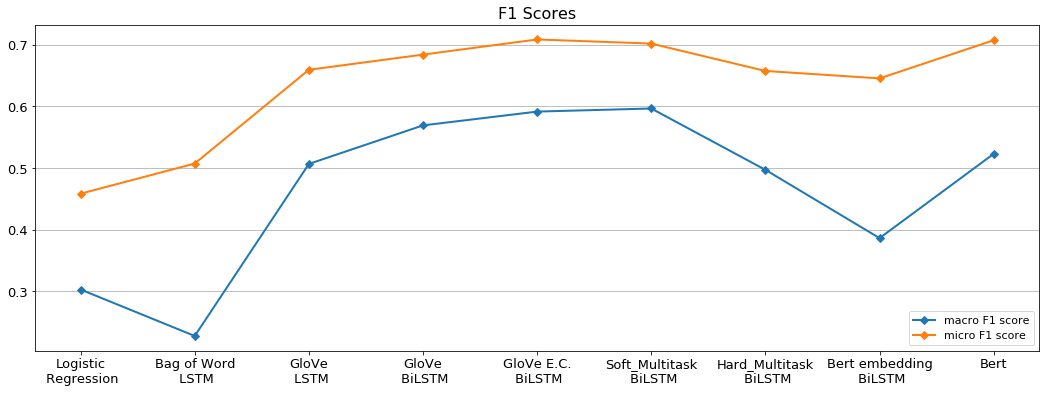

In [26]:
plt.figure(figsize=(18, 6))
plt.plot(range(9), macro_F1, linewidth=2, marker='D', label='macro F1 score')
plt.plot(range(9), micro_F1, linewidth=2, marker='D', label='micro F1 score')
plt.grid(axis='y')
plt.legend(loc=4, fontsize=11)
plt.xticks(range(9), ['Logistic\n Regression', 'Bag of Word\n LSTM', 'GloVe\n LSTM', 'GloVe\n BiLSTM', 'GloVe E.C.\n BiLSTM', 'Soft_Multitask\n BiLSTM', 'Hard_Multitask\n BiLSTM', 'Bert embedding\n BiLSTM', 'Bert'], fontsize=13)
plt.yticks(fontsize=13)
plt.title('F1 Scores', fontsize=16)
plt.show()

We can see that the Bert model has the highest score, and our customized embedding also has a nice performance.

Still need to find out why Bert Embedding BiSLTM model has a bad F1 score with a good AUC score.

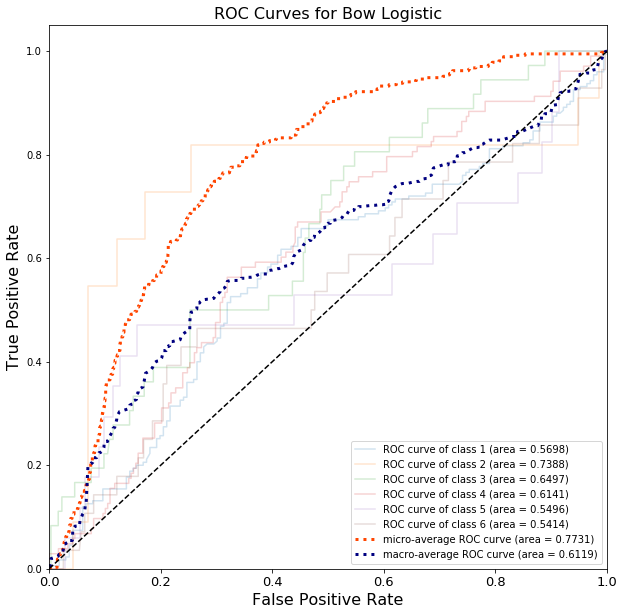

In [27]:
plot_roc_curve(y_test, bowlr_pred, title='ROC Curves for Bow Logistic', micro=True, per_class=True)

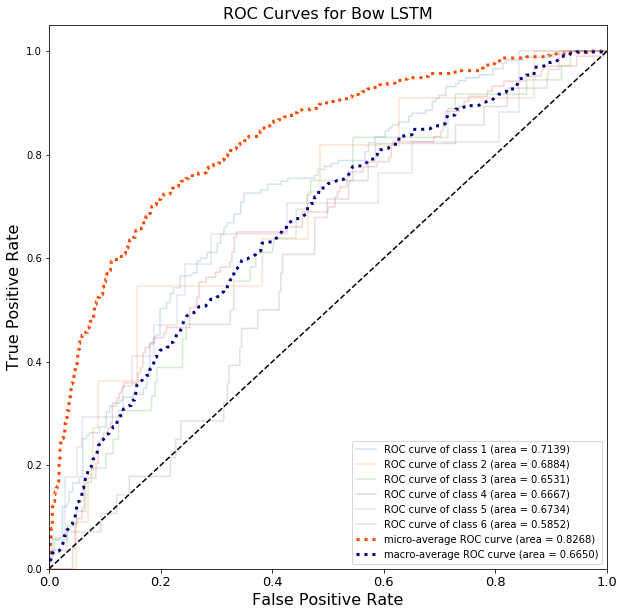

In [28]:
plot_roc_curve(y_test, bowlstm_pred, title='ROC Curves for Bow LSTM', micro=True, per_class=True)

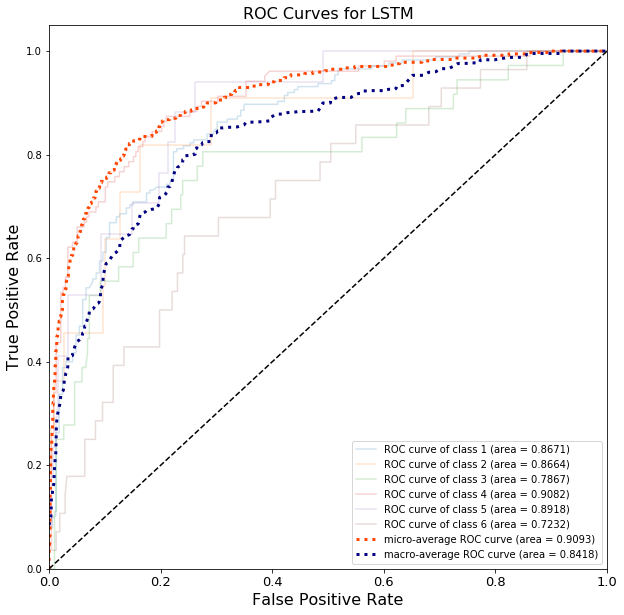

In [29]:
plot_roc_curve(y_test, lstm_pred, title='ROC Curves for LSTM', micro=True, per_class=True)

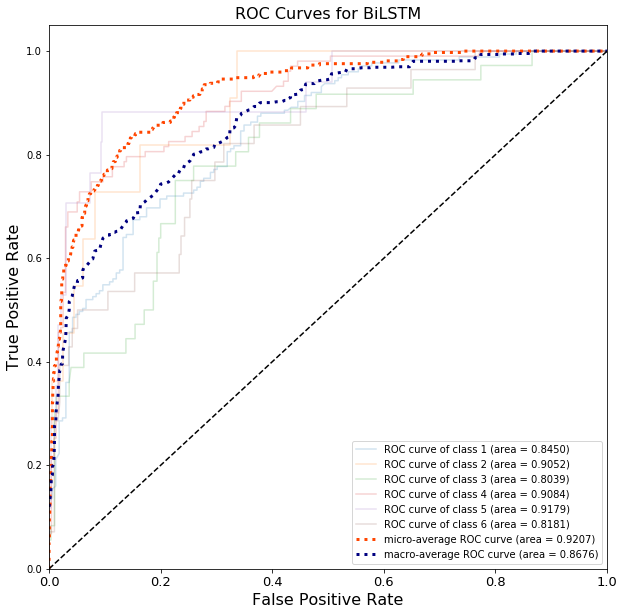

In [30]:
plot_roc_curve(y_test, bilstm_pred, title='ROC Curves for BiLSTM', micro=True, per_class=True)

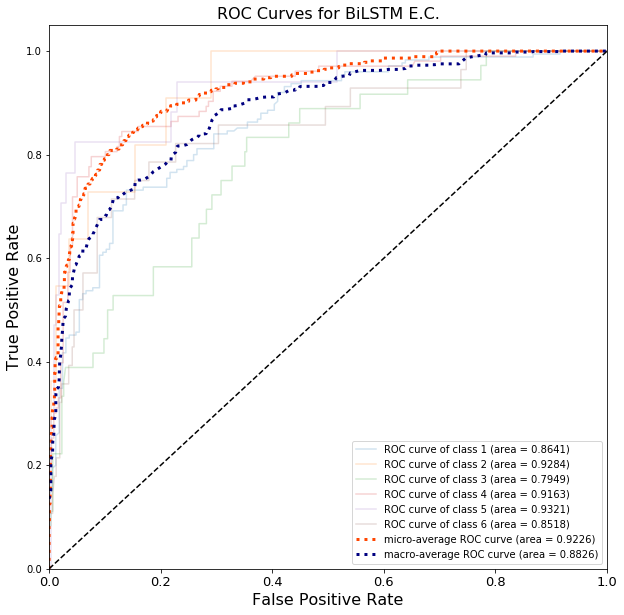

In [31]:
plot_roc_curve(y_test, bilstm_ec_pred, title='ROC Curves for BiLSTM E.C.', micro=True, per_class=True)

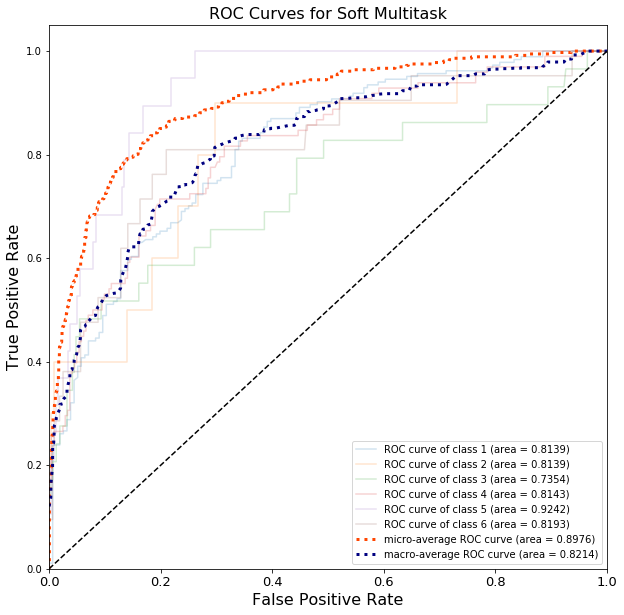

In [32]:
plot_roc_curve(y_test_up, soft_multitask_pred, title='ROC Curves for Soft Multitask', micro=True, per_class=True)

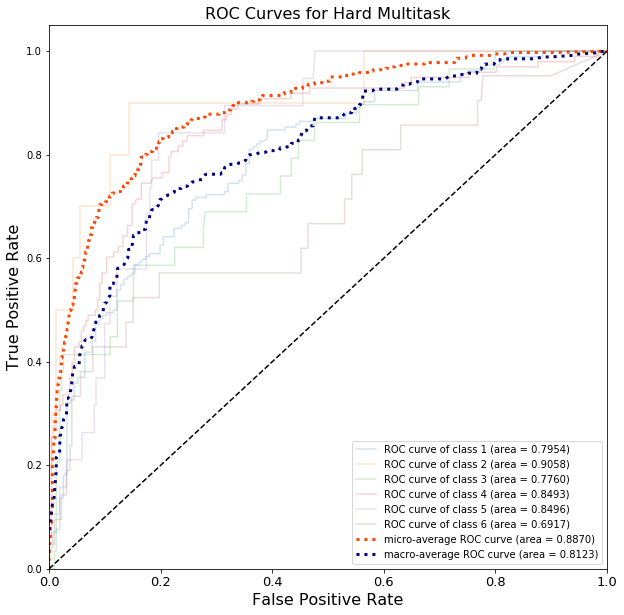

In [33]:
plot_roc_curve(y_test_hard[:y_test_hard.shape[0]-15133, :6], hard_multitask_pred, title='ROC Curves for Hard Multitask', micro=True, per_class=True)

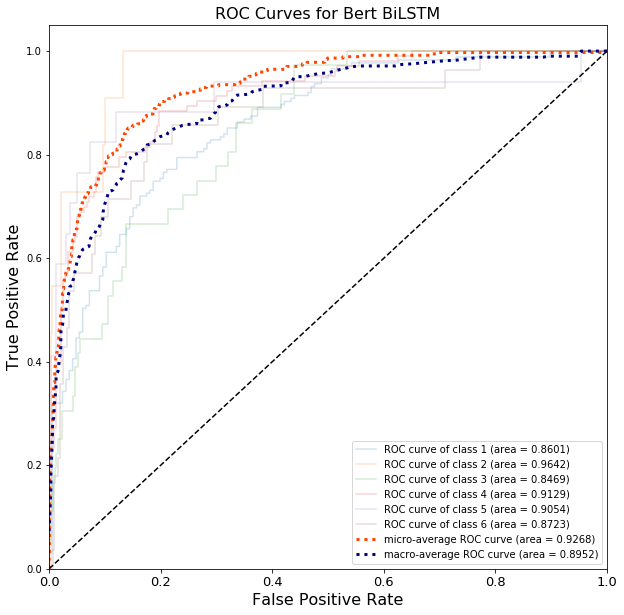

In [34]:
plot_roc_curve(y_test_bert, bertlstm_pred, title='ROC Curves for Bert BiLSTM', micro=True, per_class=True)

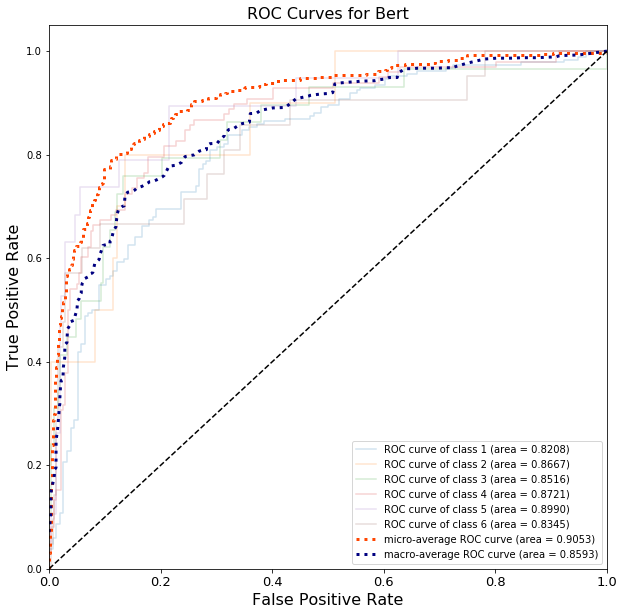

In [35]:
plot_roc_curve(bert_result['y_test'], bert_result['y_test_pred'], title='ROC Curves for Bert', micro=True, per_class=True)

In [36]:
from sklearn.metrics import roc_auc_score

macro_auc = []
micro_auc = []

macro_auc += [roc_auc_score(y_test, bowlr_pred)]
macro_auc += [roc_auc_score(y_test, bowlstm_pred)]
macro_auc += [roc_auc_score(y_test, lstm_pred)]
macro_auc += [roc_auc_score(y_test, bilstm_pred)]
macro_auc += [roc_auc_score(y_test, bilstm_ec_pred)]
macro_auc += [roc_auc_score(y_test_up, soft_multitask_pred)]
macro_auc += [roc_auc_score(y_test_hard[:y_test_hard.shape[0]-15133, :6], hard_multitask_pred)]
macro_auc += [roc_auc_score(y_test_bert, bertlstm_pred)]
macro_auc += [roc_auc_score(bert_result['y_test'], bert_result['y_test_pred'])]

micro_auc += [roc_auc_score(y_test, bowlr_pred, average='micro')]
micro_auc += [roc_auc_score(y_test, bowlstm_pred, average='micro')]
micro_auc += [roc_auc_score(y_test, lstm_pred, average='micro')]
micro_auc += [roc_auc_score(y_test, bilstm_pred, average='micro')]
micro_auc += [roc_auc_score(y_test, bilstm_ec_pred, average='micro')]
micro_auc += [roc_auc_score(y_test_up, soft_multitask_pred, average='micro')]
micro_auc += [roc_auc_score(y_test_hard[:y_test_hard.shape[0]-15133, :6], hard_multitask_pred, average='micro')]
micro_auc += [roc_auc_score(y_test_bert, bertlstm_pred, average='micro')]
micro_auc += [roc_auc_score(bert_result['y_test'], bert_result['y_test_pred'], average='micro')]

In [37]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp

def roc_data(y_test, y_pred):
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(6):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(6)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(6):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= 6

    fpr['macro'] = all_fpr
    tpr['macro'] = mean_tpr
    roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])
    return [fpr['macro'], tpr['macro'], roc_auc['macro'], fpr['micro'], tpr['micro'], roc_auc['micro']]

In [38]:
bowlr_roc = roc_data(y_test, bowlr_pred)
bowlstm_roc = roc_data(y_test, bowlstm_pred)
lstm_roc = roc_data(y_test, lstm_pred)
bilstm_roc = roc_data(y_test, bilstm_pred)
bilstm_ec_roc = roc_data(y_test, bilstm_ec_pred)
soft_multitask_roc = roc_data(y_test_up, soft_multitask_pred)
hard_multitask_roc = roc_data(y_test_hard[:y_test_hard.shape[0]-15133, :6], hard_multitask_pred)
bertlstm_roc = roc_data(y_test_bert, bertlstm_pred)
bert_roc = roc_data(bert_result['y_test'], bert_result['y_test_pred'])

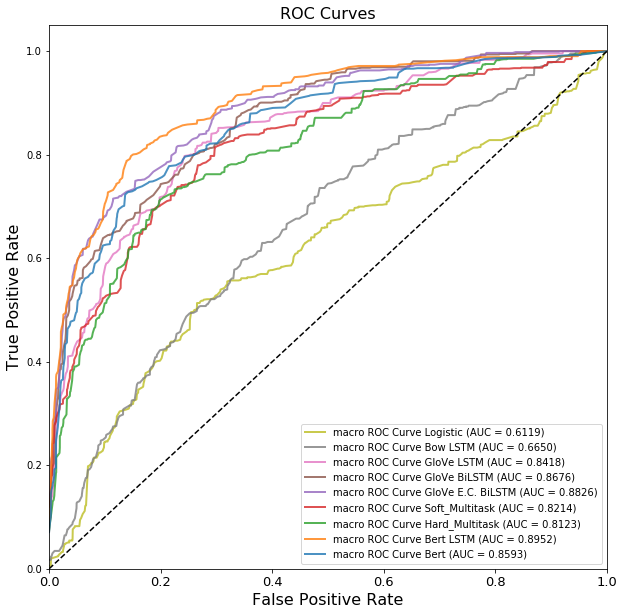

In [39]:
plt.figure(figsize=(10, 10))
plt.plot(bowlr_roc[0], bowlr_roc[1], label='macro ROC Curve Logistic (AUC = {0:0.4f})'.format(bowlr_roc[2]), alpha=0.8, linewidth=2, c='C8')
plt.plot(bowlstm_roc[0], bowlstm_roc[1], label='macro ROC Curve Bow LSTM (AUC = {0:0.4f})'.format(bowlstm_roc[2]), alpha=0.8, linewidth=2, c='C7')
plt.plot(lstm_roc[0], lstm_roc[1], label='macro ROC Curve GloVe LSTM (AUC = {0:0.4f})'.format(lstm_roc[2]), alpha=0.8, linewidth=2, c='C6')
plt.plot(bilstm_roc[0], bilstm_roc[1], label='macro ROC Curve GloVe BiLSTM (AUC = {0:0.4f})'.format(bilstm_roc[2]), alpha=0.8, linewidth=2, c='C5')
plt.plot(bilstm_ec_roc[0], bilstm_ec_roc[1], label='macro ROC Curve GloVe E.C. BiLSTM (AUC = {0:0.4f})'.format(bilstm_ec_roc[2]), alpha=0.8, linewidth=2, c='C4')
plt.plot(soft_multitask_roc[0], soft_multitask_roc[1], label='macro ROC Curve Soft_Multitask (AUC = {0:0.4f})'.format(soft_multitask_roc[2]), alpha=0.8, linewidth=2, c='C3')
plt.plot(hard_multitask_roc[0], hard_multitask_roc[1], label='macro ROC Curve Hard_Multitask (AUC = {0:0.4f})'.format(hard_multitask_roc[2]), alpha=0.8, linewidth=2, c='C2')
plt.plot(bertlstm_roc[0], bertlstm_roc[1], label='macro ROC Curve Bert LSTM (AUC = {0:0.4f})'.format(bertlstm_roc[2]), alpha=0.8, linewidth=2, c='C1')
plt.plot(bert_roc[0], bert_roc[1], label='macro ROC Curve Bert (AUC = {0:0.4f})'.format(bert_roc[2]), alpha=0.8, linewidth=2, c='C0')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc=4)
plt.title('ROC Curves', fontsize=16)
plt.show()

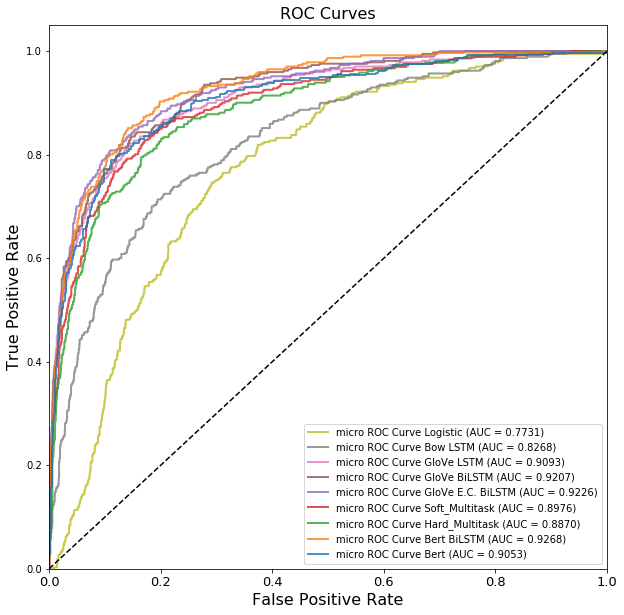

In [41]:
plt.figure(figsize=(10, 10))
plt.plot(bowlr_roc[3], bowlr_roc[4], label='micro ROC Curve Logistic (AUC = {0:0.4f})'.format(bowlr_roc[5]), alpha=0.8, linewidth=2, c='C8')
plt.plot(bowlstm_roc[3], bowlstm_roc[4], label='micro ROC Curve Bow LSTM (AUC = {0:0.4f})'.format(bowlstm_roc[5]), alpha=0.8, linewidth=2, c='C7')
plt.plot(lstm_roc[3], lstm_roc[4], label='micro ROC Curve GloVe LSTM (AUC = {0:0.4f})'.format(lstm_roc[5]), alpha=0.8, linewidth=2, c='C6')
plt.plot(bilstm_roc[3], bilstm_roc[4], label='micro ROC Curve GloVe BiLSTM (AUC = {0:0.4f})'.format(bilstm_roc[5]), alpha=0.8, linewidth=2, c='C5')
plt.plot(bilstm_ec_roc[3], bilstm_ec_roc[4], label='micro ROC Curve GloVe E.C. BiLSTM (AUC = {0:0.4f})'.format(bilstm_ec_roc[5]), alpha=0.8, linewidth=2, c='C4')
plt.plot(soft_multitask_roc[3], soft_multitask_roc[4], label='micro ROC Curve Soft_Multitask (AUC = {0:0.4f})'.format(soft_multitask_roc[5]), alpha=0.8, linewidth=2, c='C3')
plt.plot(hard_multitask_roc[3], hard_multitask_roc[4], label='micro ROC Curve Hard_Multitask (AUC = {0:0.4f})'.format(hard_multitask_roc[5]), alpha=0.8, linewidth=2, c='C2')
plt.plot(bertlstm_roc[3], bertlstm_roc[4], label='micro ROC Curve Bert BiLSTM (AUC = {0:0.4f})'.format(bertlstm_roc[5]), alpha=0.8, linewidth=2, c='C1')
plt.plot(bert_roc[3], bert_roc[4], label='micro ROC Curve Bert (AUC = {0:0.4f})'.format(bert_roc[5]), alpha=0.8, linewidth=2, c='C0')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc=4)
plt.title('ROC Curves', fontsize=16)
plt.show()

Here the best model is BiLSTM with Bert Embedding, and our customized embedding also performs very nice.

The Bert model does not have an outstanding AUC score. Maybe our dataset is too small, or maybe we need to understand more about Bert to take full use of it.